<a href="https://colab.research.google.com/github/rajy4683/EIP4_new/blob/master/RajeshY1stDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


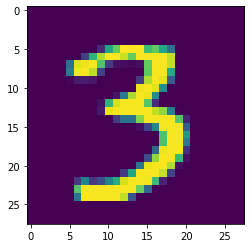

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10000])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(128, 3, activation='relu'))
model.add(Convolution2D(256, 3, activation='relu'))
model.add(Convolution2D(512, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 512)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 10)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 84s 1ms/step - loss: 0.1372 - acc: 0.9575
Epoch 2/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0584 - acc: 0.9821
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0441 - acc: 0.9862
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0355 - acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0294 - acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0257 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0217 - acc: 0.9934
Epoch 8/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0185 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0163 - acc: 0.9949
Epoch 10/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0151 - acc:

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=3, verbose=1)

Epoch 1/3
   96/60000 [..............................] - ETA: 1:21 - loss: 1.7474e-04 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 81s 1ms/step - loss: 0.0129 - acc: 0.9956
Epoch 2/3
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0135 - acc: 0.9957
Epoch 3/3
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0113 - acc: 0.9962


In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=3, verbose=1)

Epoch 1/3
   96/60000 [..............................] - ETA: 1:23 - loss: 3.0435e-04 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 81s 1ms/step - loss: 0.0102 - acc: 0.9966
Epoch 2/3
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0107 - acc: 0.9963
Epoch 3/3
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0085 - acc: 0.9974


In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=2, verbose=1)

Epoch 1/2
   96/60000 [..............................] - ETA: 1:51 - loss: 7.7561e-04 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 81s 1ms/step - loss: 0.0125 - acc: 0.9961
Epoch 2/2
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0085 - acc: 0.9972


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)

[0.05224425639792353, 0.9902]


In [0]:
model.save('new1_9902.hdf5')

In [0]:
from keras.models import load_model
# Custom model loaded for testing--->This model achieved 99.06% accuracy:
model2 = load_model('new1.hdf5')

In [35]:
score2 = model2.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 5s 460us/step


In [36]:
print(score2)

[0.044966550774718145, 0.9906]


In [0]:
y_pred = model.predict(X_test)

In [32]:
print(y_pred[:9])
print(y_test[:9])

[[4.9442495e-29 3.6437690e-22 1.6791307e-15 2.2452095e-13 4.8435105e-24
  6.1420301e-22 0.0000000e+00 1.0000000e+00 1.1101856e-21 3.7215891e-17]
 [5.0956928e-10 3.6994980e-11 1.0000000e+00 1.0796950e-16 5.3773751e-17
  1.3398369e-25 3.7035434e-11 1.6539367e-23 3.8802804e-15 6.1642049e-24]
 [6.4807378e-17 1.0000000e+00 4.0539807e-13 8.2855721e-18 9.6102970e-10
  2.4222698e-14 6.0419631e-15 3.8871795e-10 3.0954372e-14 1.1197375e-15]
 [1.0000000e+00 3.1853063e-26 4.9207920e-19 1.6991147e-19 2.9990926e-20
  1.6342067e-15 3.8556842e-11 3.9686859e-19 4.6016018e-13 1.8834639e-10]
 [1.1740578e-21 1.9923143e-22 3.4473701e-19 7.9751791e-26 1.0000000e+00
  1.2126851e-22 5.9612037e-19 3.4326614e-18 8.8236269e-15 1.0399656e-09]
 [1.1255189e-15 1.0000000e+00 2.9669075e-12 9.0049870e-19 7.0666445e-10
  2.1131835e-15 1.7926012e-15 6.7142443e-09 4.9004983e-14 1.6891327e-16]
 [5.8162272e-35 1.2603216e-19 1.0497544e-17 2.1227783e-26 1.0000000e+00
  1.6836901e-16 6.1976591e-25 5.6133360e-19 1.9351650e-11 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

type(y_pred[0])

numpy.ndarray

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [23]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7fe7be371be0>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fe7bec00438>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fe7bec00588>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fe7bf0942e8>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fe7be3ba438>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7fe7be3c8710>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7fe7be3db0b8>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7fe7be364860>,
 'flatten_1': <keras.layers.core.Flatten at 0x7fe7be3693c8>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7fe7be3d1240>}

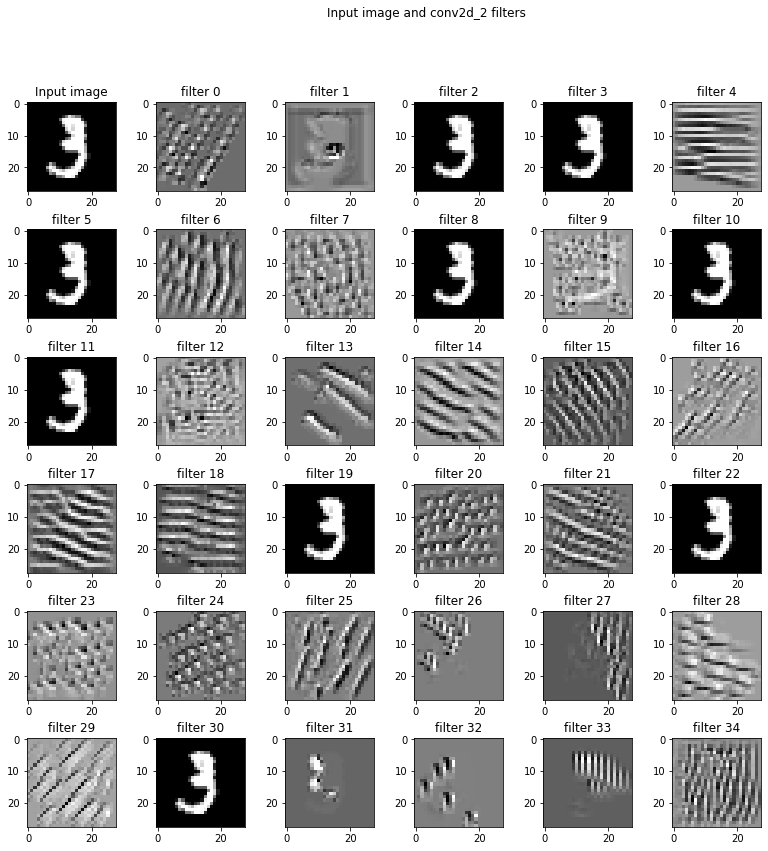

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(img = np.array(X_train[10]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name='conv2d_2')

In [38]:
!sudo apt install git


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
